In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [ ]:
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


In [ ]:
df.dropna(inplace=True)

In [ ]:
ev_adoption_by_year=df['Model Year'].value_counts().sort_index()

In [ ]:
print(ev_adoption_by_year)

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64


/var/folders/jh/7pswgd5n1358f225bl_k3gnm0000gn/T/ipykernel_12578/1069772104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index,y=ev_adoption_by_year.values,palette="viridis")


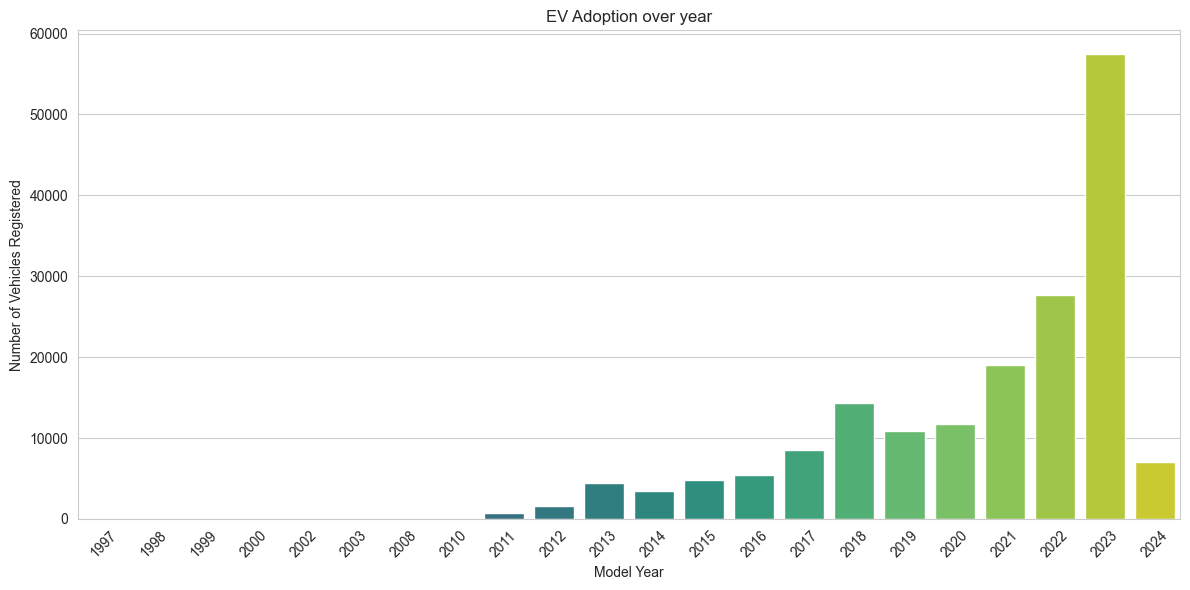

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(x=ev_adoption_by_year.index,y=ev_adoption_by_year.values,palette="viridis")
plt.title('EV Adoption over year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
ev_country=df['County'].value_counts()

In [ ]:
top_countries=ev_country.head(3).index

In [ ]:
top_countries

Index(['King', 'Snohomish', 'Pierce'], dtype='object', name='County')

In [ ]:
top_countries_data=df[df['County'].isin(top_countries)]

In [ ]:
city_with_top_countries=top_countries_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of vehicles')

In [ ]:
top_cities=city_with_top_countries.head(10)
top_cities

,County,City,Number of vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
5,King,Renton,4980
6,Snohomish,Bothell,4663
7,Pierce,Tacoma,3722
8,King,Tukwila,2927
9,King,Kent,2782


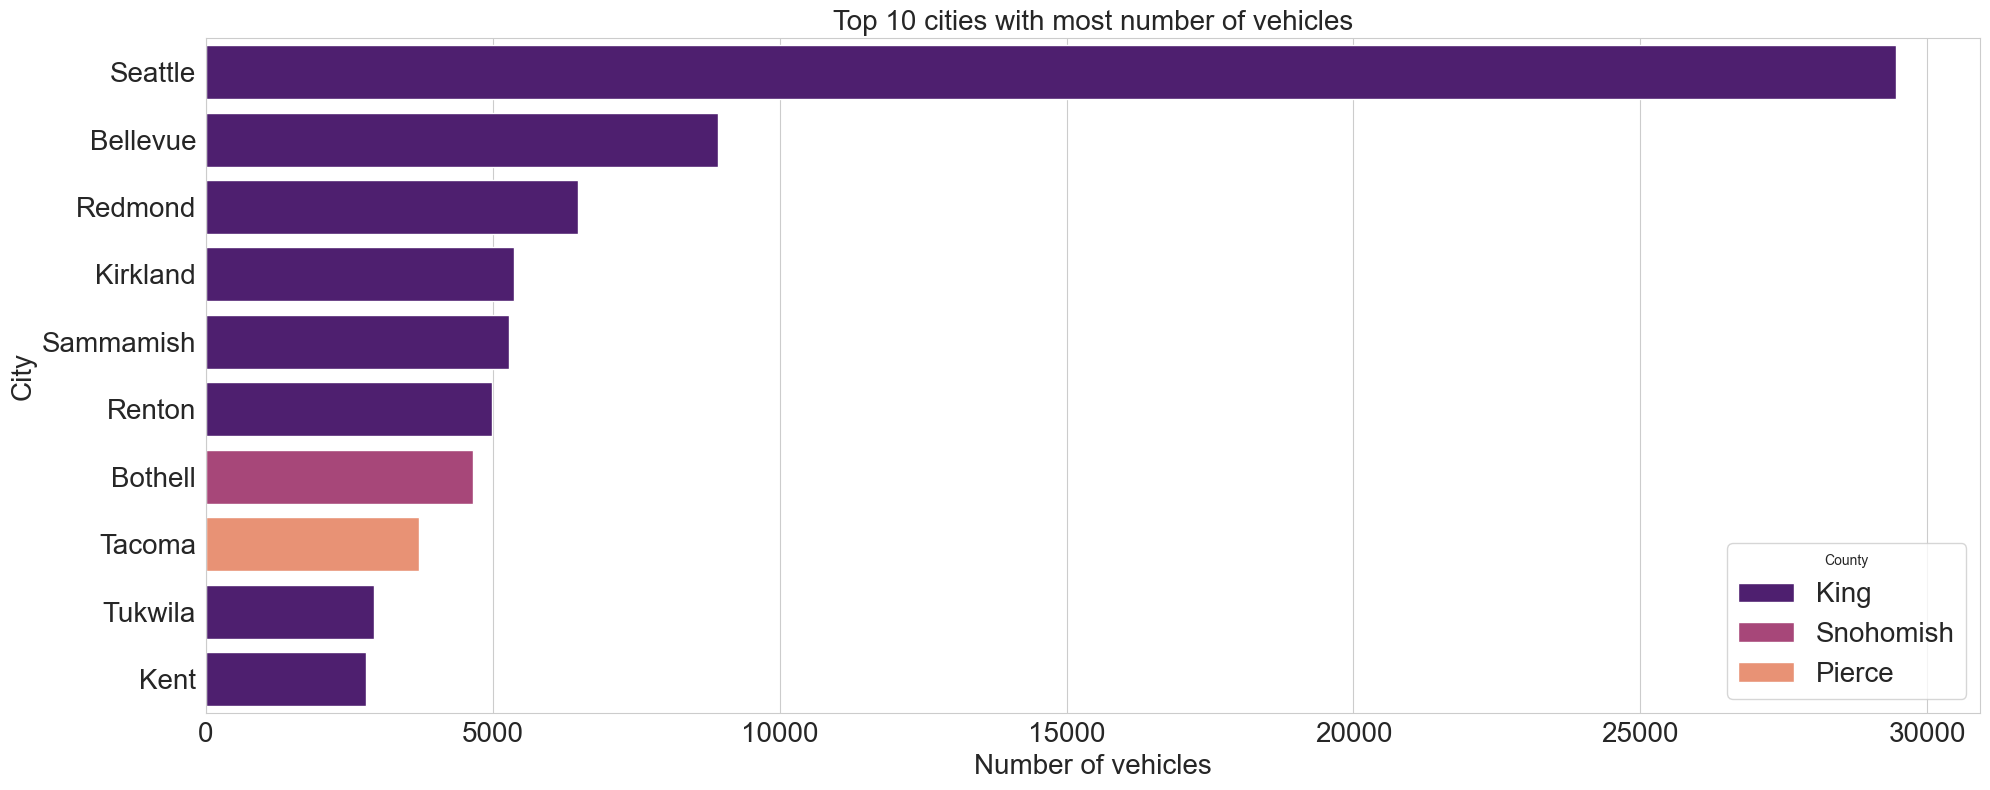

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Number of vehicles',y='City',hue='County', data=top_cities,palette="magma")
plt.title('Top 10 cities with most number of vehicles',fontsize=20)
plt.xlabel('Number of vehicles',fontsize=20)
plt.ylabel('City',fontsize=20)
plt.legend(title='County',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df.columns
electric_type=df['Electric Vehicle Type'].value_counts()
electric_type.index

Index(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype='object', name='Electric Vehicle Type')

/var/folders/jh/7pswgd5n1358f225bl_k3gnm0000gn/T/ipykernel_12578/358877873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=electric_type.index,x=electric_type.values,palette="rocket")


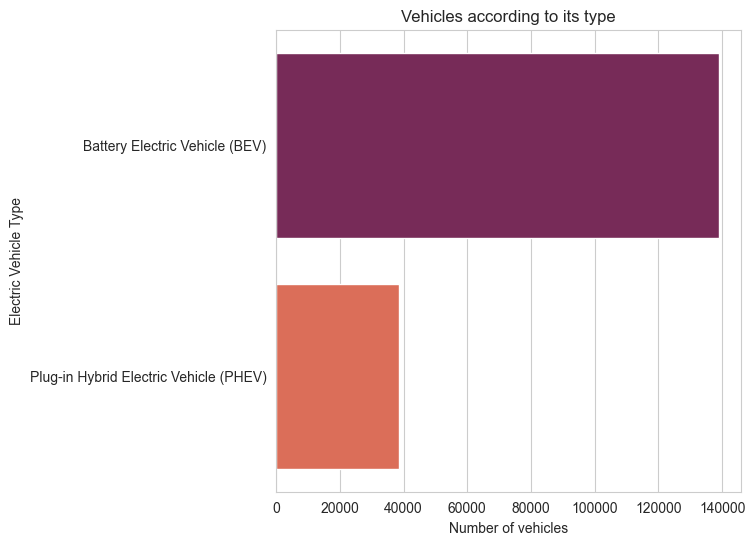

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(y=electric_type.index,x=electric_type.values,palette="rocket")
plt.title('Vehicles according to its type')
plt.xlabel('Number of vehicles')
plt.show()

/var/folders/jh/7pswgd5n1358f225bl_k3gnm0000gn/T/ipykernel_12578/3632678823.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make.values,y=ev_make.index,palette="cubehelix")


Text(0.5, 0, 'Number of vehicles')

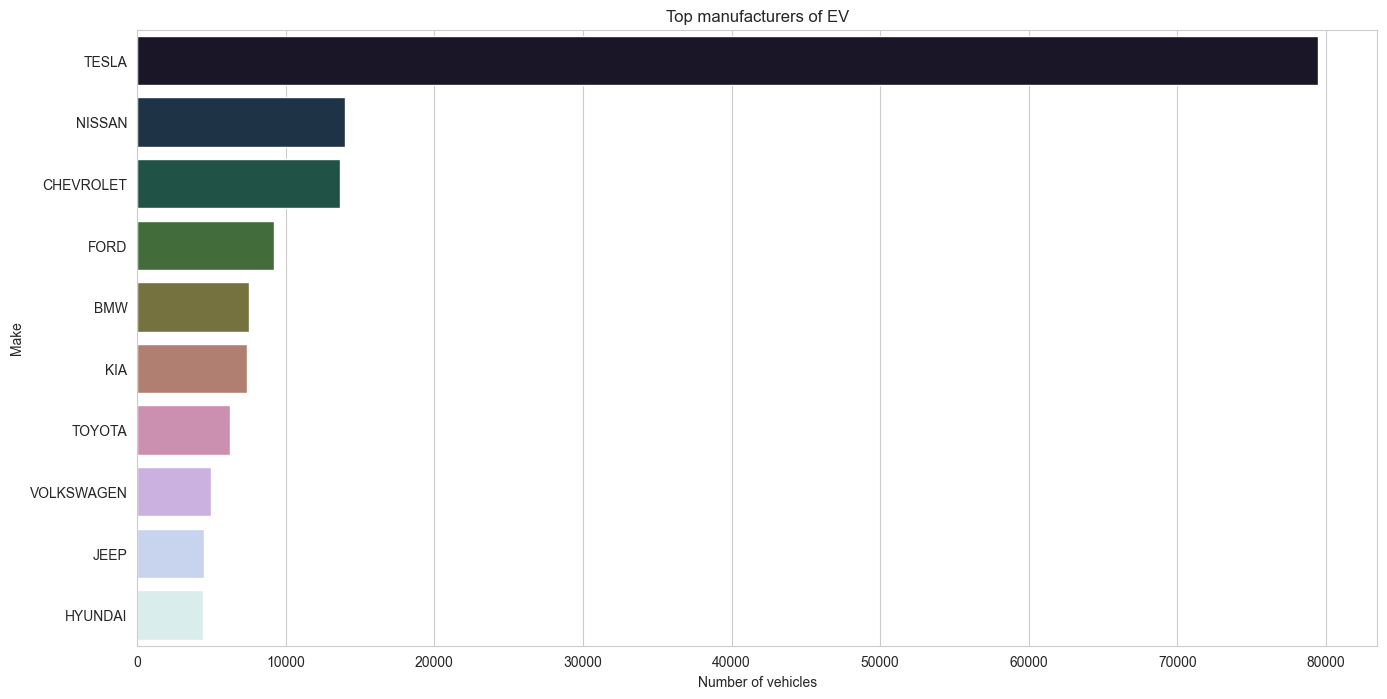

In [ ]:
ev_make=df['Make'].value_counts().head(10)

plt.figure(figsize=(16,8))
sns.barplot(x=ev_make.values,y=ev_make.index,palette="cubehelix")
plt.title('Top manufacturers of EV')
plt.xlabel('Number of vehicles')

In [ ]:
top_ev_make=ev_make.value_counts().head(3)
top_ev_make

count
79471    1
13984    1
13651    1
Name: count, dtype: int64

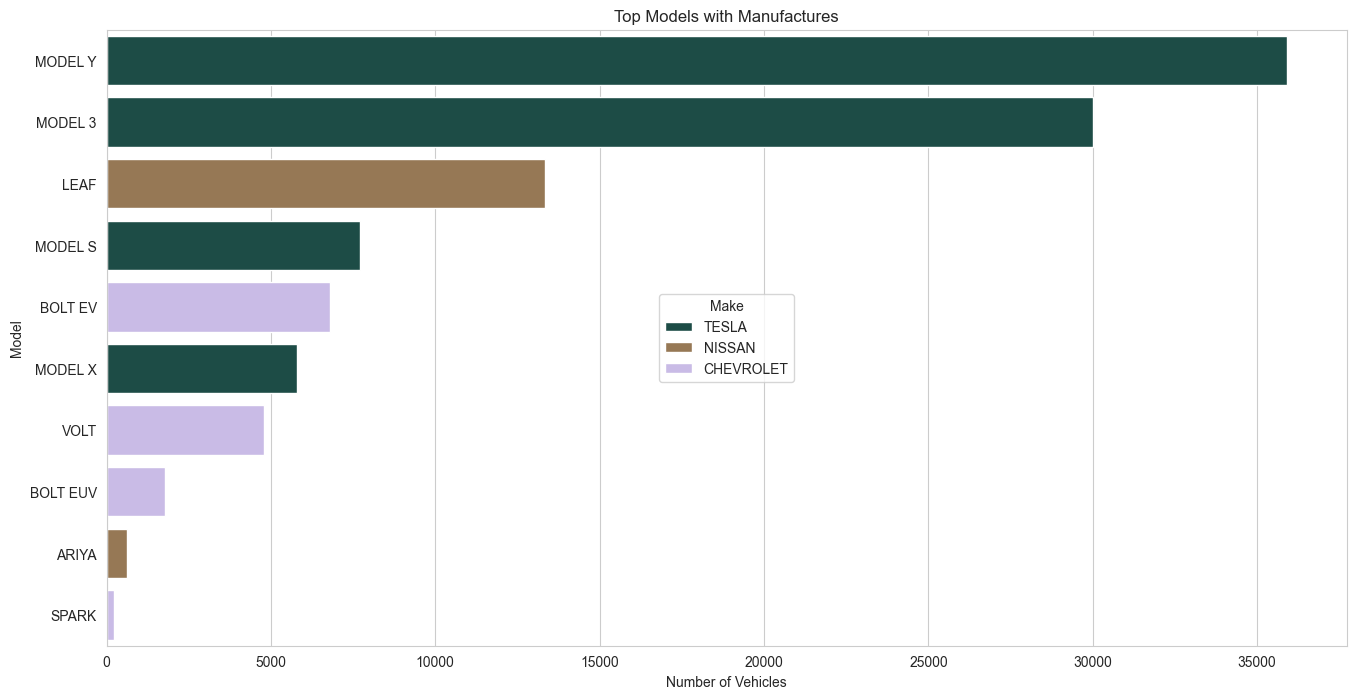

In [ ]:
top_ev_make=ev_make.head(3).index
top_ev_make_data=df[df['Make'].isin(top_ev_make)]
ev_model_make=top_ev_make_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles').head(10)

plt.figure(figsize=(16,8))
sns.barplot(x='Number of Vehicles',y='Model',hue='Make',data=ev_model_make,palette='cubehelix')
plt.title('Top Models with Manufactures')
plt.xlabel('Number of Vehicles',fontsize=10)
plt.ylabel('Model',fontsize=10)
plt.legend(title='Make',fontsize=10,loc='center')

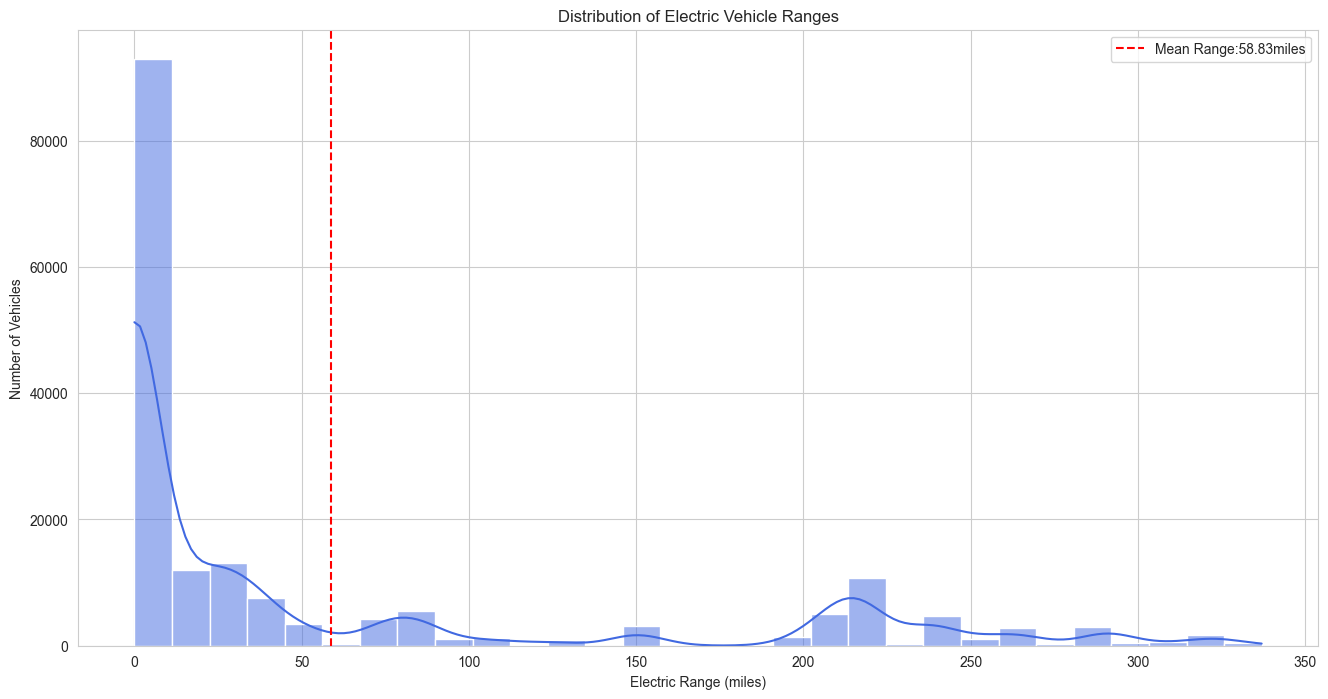

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(df['Electric Range'],bins=30,kde=True,color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(df['Electric Range'].mean(),color='red',linestyle='--',label=f'Mean Range:{df["Electric Range"].mean():.2f}miles')
plt.legend()
plt.show()

/var/folders/jh/7pswgd5n1358f225bl_k3gnm0000gn/T/ipykernel_12578/444780209.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Model Year',y='Electric Range',data=avg_model_range,marker='o',color='green',ci=None)


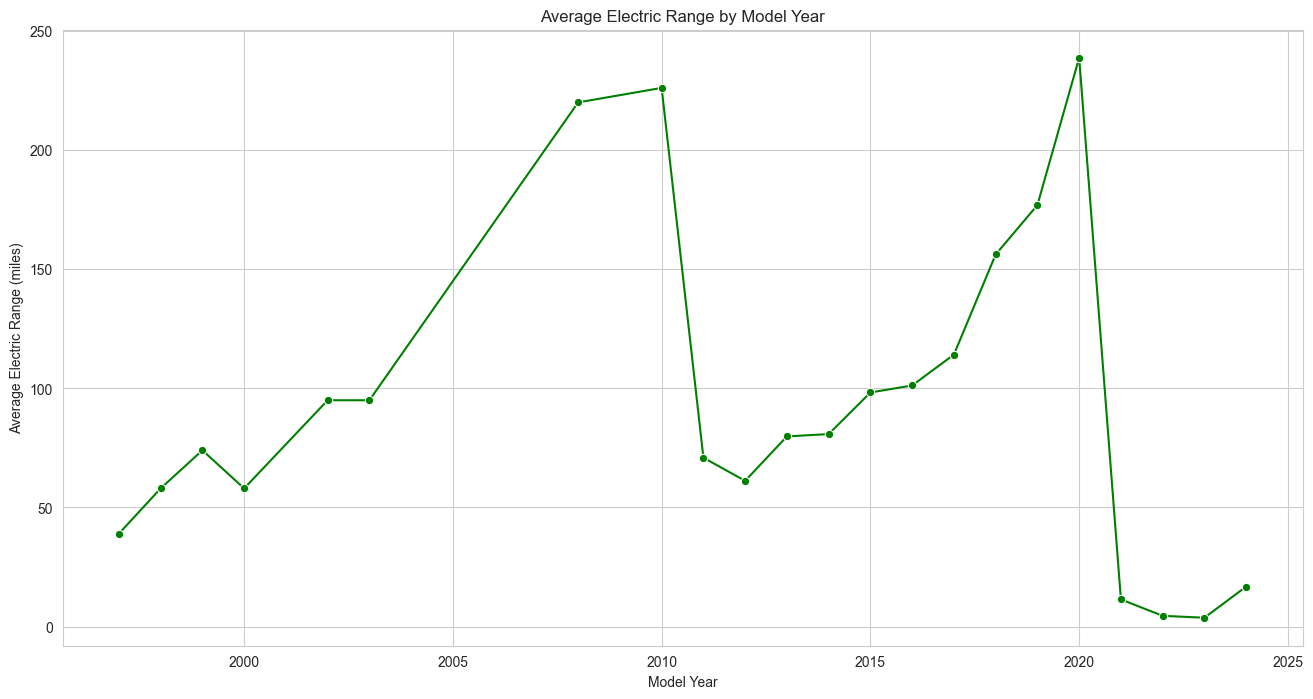

In [ ]:
avg_model_range=df.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(16,8))
sns.lineplot(x='Model Year',y='Electric Range',data=avg_model_range,marker='o',color='green',ci=None)
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

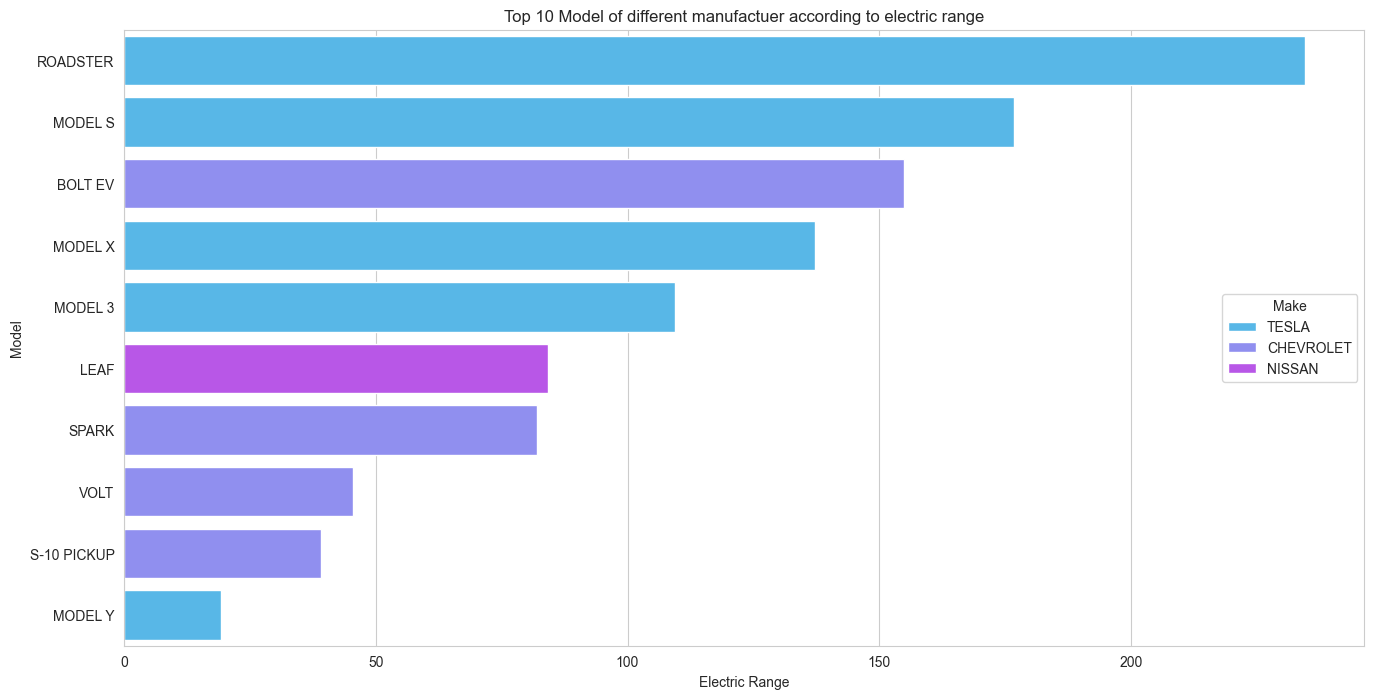

In [ ]:
ev_range_model_make=top_ev_make_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
ev_range_model_make_top10=ev_range_model_make.head(10)

plt.figure(figsize=(16,8))
sns.barplot(x='Electric Range',y='Model',hue='Make',data=ev_range_model_make_top10,palette='cool')
plt.title('Top 10 Model of different manufactuer according to electric range')
plt.legend(title='Make',loc='center right')
plt.show()

In [ ]:
ev_registration_count=df['Model Year'].value_counts().sort_index()
ev_registration_count

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

<Axes: xlabel='Model Year'>

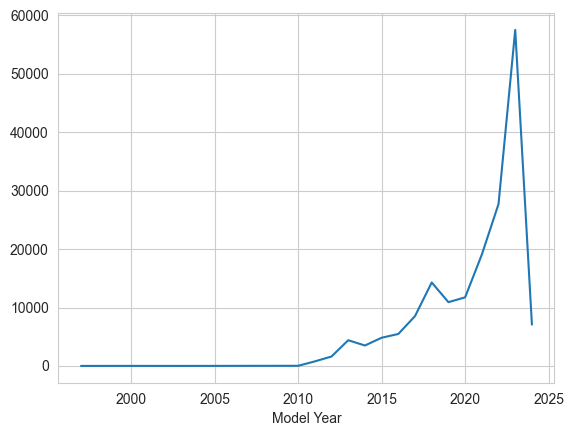

In [ ]:
sns.lineplot(x=ev_registration_count.index,y=ev_registration_count.values)

In [ ]:
!pip3 install scipy



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [ ]:
from scipy.optimize import curve_fit
filtered_years=ev_registration_count[ev_registration_count.index<=2023]
def expo_growth(x,a,b):
    return a * np.exp(b*x)
x_data=filtered_years.index-filtered_years.index.min()
y_data=filtered_years.values

params, covariance = curve_fit(expo_growth, x_data, y_data)
a, b = params

forecasted_years=np.arange(2024,2024+6)-filtered_years.index.min()
forecasted_values = expo_growth(forecasted_years, a, b)

forecasted_evs = {
    int(year): float(value)
    for year, value in zip(forecasted_years + filtered_years.index.min(), forecasted_values)
}
print(forecasted_evs)



{2024: 79079.20586958311, 2025: 119653.9574632871, 2026: 181047.20930351445, 2027: 273940.72616986133, 2028: 414496.97978313005, 2029: 627171.2448582925}


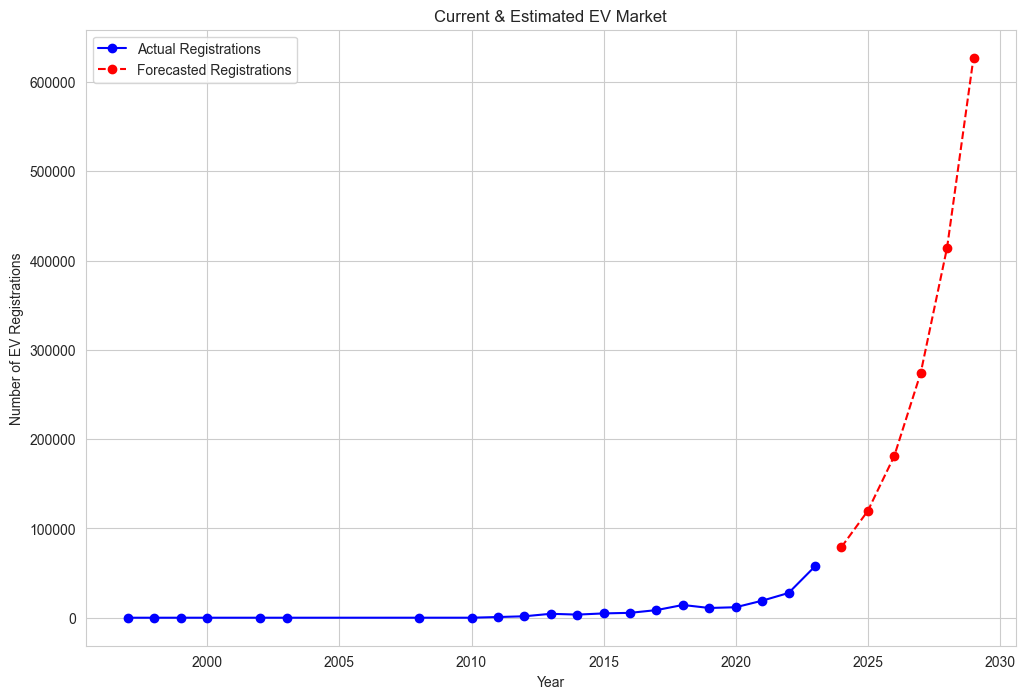

In [ ]:
actual_years=filtered_years.index
full_years=np.arange(2024,2029+1)

actual_values=filtered_years.values
full_values=[forecasted_evs[year] for year in full_years]

plt.figure(figsize=(12,8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(full_years,full_values, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

/var/folders/jh/7pswgd5n1358f225bl_k3gnm0000gn/T/ipykernel_12578/2067724604.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")


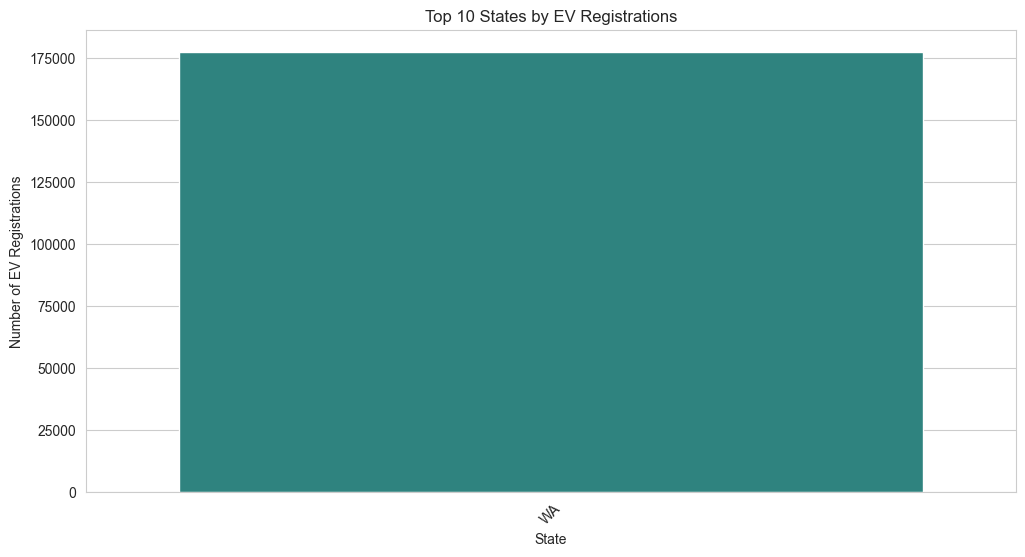

/var/folders/jh/7pswgd5n1358f225bl_k3gnm0000gn/T/ipykernel_12578/2067724604.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, palette="coolwarm")


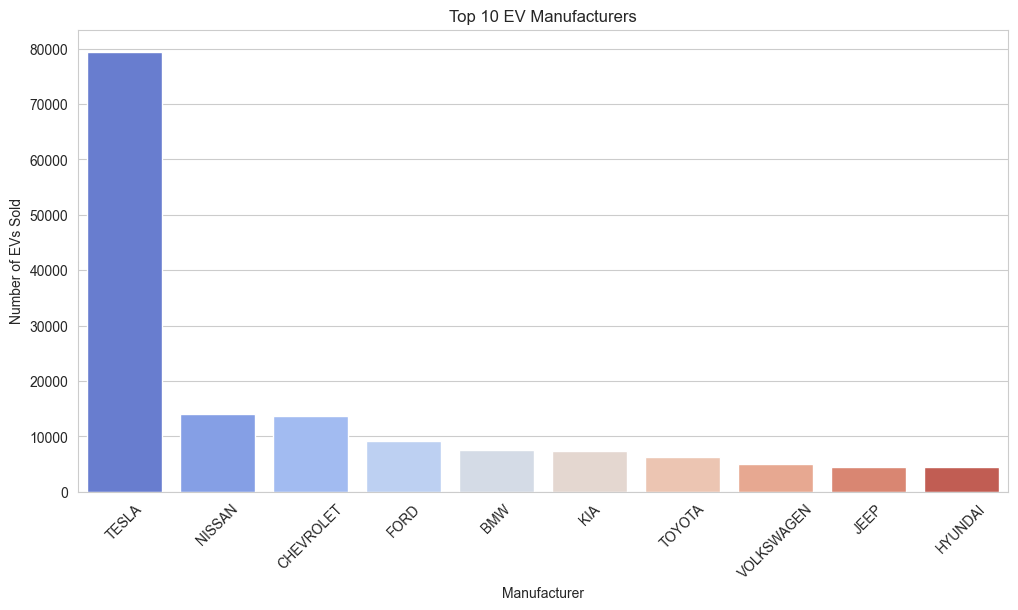

KeyError: 'Electric Range'

<Figure size 1200x600 with 0 Axes>

In [ ]:
df.columns

Index(['vin (1-10)', 'county', 'city', 'state', 'postal code', 'model year',
       'make', 'model', 'electric vehicle type',
       'clean alternative fuel vehicle (cafv) eligibility', 'electric range',
       'base msrp', 'legislative district', 'dol vehicle id',
       'vehicle location', 'electric utility', '2020 census tract'],
      dtype='object')